In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import time
import copy
import os
from Preprocess import Anime

In [4]:
batchze = 32
lr = 1e-3
epochs = 10
device = torch.device('cuda')
torch.manual_seed(1234)

# load data 
train_db = Anime('..\\Images', 128, 'train')
val_db = Anime('..\\Images', 128, 'val')
test_db = Anime('..\\Images', 128, 'test')


train_loader = DataLoader(train_db,batch_size= batchze, shuffle= True)
val_loader = DataLoader(val_db,batch_size= batchze)
test_loader = DataLoader(test_db,batch_size= batchze)

images-size: torch.Size([32, 3, 128, 128])
out-size: torch.Size([3, 522, 1042])


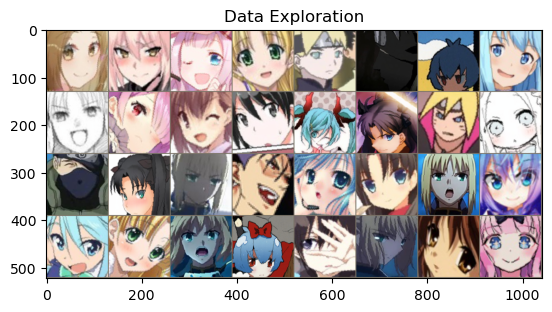

In [5]:


def imshow(inp, title=None):
    
    inp = inp.cpu() if device else inp
    inp = inp.numpy().transpose((1, 2, 0))
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
images, labels = next(iter(train_loader)) 
print("images-size:", images.shape)

out = torchvision.utils.make_grid(images)
print("out-size:", out.shape)

imshow(out,title = "Data Exploration")

{'abigail_williams_(fate)': 75, 'albedo': 75, 'aqua_(konosuba)': 75, 'asia_argento': 72, 'ayanami_rei': 80, 'chitanda_eru': 75, 'fujiwara_chika': 75, 'furukawa_nagisa': 75, 'gilgamesh': 75, 'hatake_kakashi': 178, 'hatsune_miku': 140, 'kirito': 75, 'lancer': 75, 'misaka_mikoto': 75, 'okita_souji_(fate)': 75, 'ram_rezero': 74, 'saber': 183, 'takagi-san': 75, 'tohsaka_rin': 155, 'uzumaki_boruto': 164, 'zero_two_(darling_in_the_franxx)': 75}


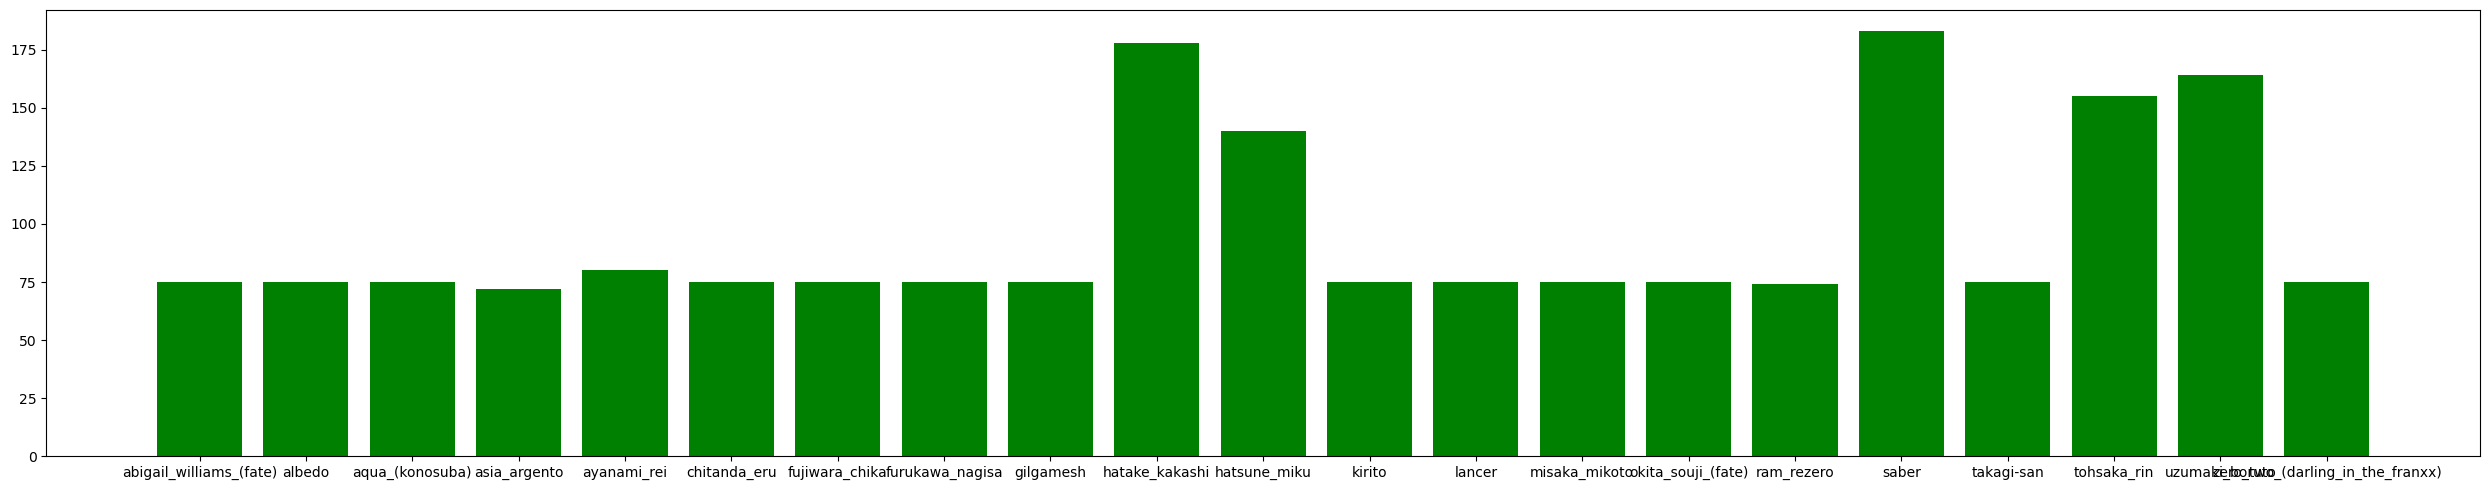

In [16]:
import os, os.path
files = folders = 0
path = "../Images/"
dirname = [name for name in os.listdir(path) if os.path.isdir(path+name)]
datacount = {}
plt.rcParams["figure.figsize"] = [25, 5]
plt.rcParams["figure.autolayout"] = True
for i in dirname:
    path_new = path + i
    file_counter = sum([len(files) for r, d, files in os.walk(path_new)])
    datacount[i] = file_counter
plt.bar(datacount.keys(), datacount.values(),color='g')
print(datacount)